# This procedure does some machine learning tasks on the UCI Tennis data. The data is stored in the form of CSV files in current folder. We will use python to implement machine learning.

In [617]:
#Lets load os module to fine the files present in the directory
import os

Our csv files are in the data folder. So let's see the files first

In [618]:
data_files_path = 'data/'
data_files = os.listdir(data_files_path)

In [619]:
print data_files

['Wimbledon-women-2013.csv', 'FrenchOpen-women-2013.csv', 'AusOpen-men-2013.csv', 'FrenchOpen-men-2013.csv', 'Wimbledon-men-2013.csv', 'AusOpen-women-2013.csv', 'USOpen-women-2013.csv', 'USOpen-men-2013.csv']


Now lets load the data from the files. We will use pandas module to load the data.

In [620]:
import pandas as pd
input_data = pd.read_csv(data_files_path + data_files[0]);

Now lets see how does the data looks. Lets see first 5 rows of the data.

In [621]:
input_data[:5]

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,M.Koehler,V.Azarenka,1,0,0,2,60,21,40,8,...,16,6,8,4,NaN,6,6,NaN,NaN,NaN
1,E.Baltacha,F.Pennetta,1,0,0,2,69,23,31,6,...,6,5,14,11,NaN,6,6,NaN,NaN,NaN
2,S-W.Hsieh,T.Maria,1,1,2,0,63,17,37,10,...,1,0,8,2,NaN,1,0,NaN,NaN,NaN
3,A.Cornet,V.King,1,1,2,1,57,36,43,21,...,4,1,48,32,NaN,6,3,1,NaN,NaN
4,Y.Putintseva,K.Flipkens,1,0,0,2,73,34,27,12,...,9,3,35,24,NaN,7,6,NaN,NaN,NaN


Lets see the Player1 column for first 5 rows

In [622]:
input_data['Player1'][:5]

0       M.Koehler
1      E.Baltacha
2       S-W.Hsieh
3        A.Cornet
4    Y.Putintseva
Name: Player1, dtype: object

Now lets make a function to load data from all the data files. Since each file belongs to certain type of match/tournament. We will add additional column indiacting the file name or tournament type.

In [623]:
def load_data(data_files):
    input_data = None;
    input_data_initialized = False; # to check the state of input_data variable
    for file_name in data_files:
        print 'Reading from file ' + file_name
        if not input_data_initialized:
            #Initialize the input_data
            data = pd.read_csv(data_files_path + file_name);
            input_data = data;
            input_data['Type'] = file_name.split('.')[0];
            input_data_initialized = True;
        else:
            #Store the data into data variable
            data = pd.read_csv(data_files_path + file_name);
            data['Type'] = file_name.split('.')[0];
            #Append the data into input_data
            input_data = input_data.append(data);
    return input_data;

In [624]:
#Lets load data from all the files
input_data = load_data(data_files);

Reading from file Wimbledon-women-2013.csv
Reading from file FrenchOpen-women-2013.csv
Reading from file AusOpen-men-2013.csv
Reading from file FrenchOpen-men-2013.csv
Reading from file Wimbledon-men-2013.csv
Reading from file AusOpen-women-2013.csv
Reading from file USOpen-women-2013.csv
Reading from file USOpen-men-2013.csv


Lets check the size of data

In [625]:
input_data.shape

(943, 43)

This means the input_data have 943 rows and 42 columns

Lets see first 5 rows of input_data

In [626]:
input_data[:5]

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,Type
0,M.Koehler,V.Azarenka,1,0,0,2,60,21,40,8,...,6,8,4,NaN,6,6,NaN,NaN,NaN,Wimbledon-women-2013
1,E.Baltacha,F.Pennetta,1,0,0,2,69,23,31,6,...,5,14,11,NaN,6,6,NaN,NaN,NaN,Wimbledon-women-2013
2,S-W.Hsieh,T.Maria,1,1,2,0,63,17,37,10,...,0,8,2,NaN,1,0,NaN,NaN,NaN,Wimbledon-women-2013
3,A.Cornet,V.King,1,1,2,1,57,36,43,21,...,1,48,32,NaN,6,3,1,NaN,NaN,Wimbledon-women-2013
4,Y.Putintseva,K.Flipkens,1,0,0,2,73,34,27,12,...,3,35,24,NaN,7,6,NaN,NaN,NaN,Wimbledon-women-2013


Lets read all the player names and match types

In [627]:
player_names = input_data['Player1'].copy();
player_names = player_names.append(input_data['Player2']);

tournament_types = input_data['Type'].copy();

In [628]:
player_names[:5]

0       M.Koehler
1      E.Baltacha
2       S-W.Hsieh
3        A.Cornet
4    Y.Putintseva
dtype: object

We need to divide the data into two parts. One to train the learning algorithms, and other part to test the algorithms. We will select 100 rows randomaly for test data.

In [629]:
import numpy as np
#Lets randomize the rows in input_data
input_data = input_data.take(np.random.permutation(len(input_data))[:])
#Lets take first 100 rows now
test_data = input_data[:100].copy();
input_data = input_data[100:-1];

Test data looks like:

In [630]:
test_data.shape

(100, 43)

In [631]:
input_data.shape

(842, 43)

The Result column have results of all the matches. 
The result is 1 if Player1 won the match, it is zero if Player2 won the match. We will be feeding all this data to learning algorithm. The algorithm accepts numeric values only. So we need to convert the player names and match types into numeric values. We will be identifying each player with a unique number. To do so lets import preprocessing module of sklearn, and use the label encoder availabel in it.

In [632]:
from sklearn import preprocessing
name_encoder = preprocessing.LabelEncoder()
tournament_encoder = preprocessing.LabelEncoder()

Now lets transform the names into numeric values

In [633]:
names_fit = name_encoder.fit(player_names)
tournament_fit = tournament_encoder.fit(tournament_types)
input_data['Player1'] = names_fit.transform(input_data['Player1']);
input_data['Player2'] = names_fit.transform(input_data['Player2']);
input_data['Type'] = tournament_fit.transform(input_data['Type']);

test_data['Player1'] = names_fit.transform(test_data['Player1']);
test_data['Player2'] = names_fit.transform(test_data['Player2']);
test_data['Type'] = tournament_fit.transform(test_data['Type']);

In [634]:
input_data[['Player1', 'Player2', 'Type']][:5]

,Player1,Player2,Type
48,519,299,0
54,364,104,4
9,317,482,6
1,188,621,5
107,615,297,2


In [635]:
test_data[['Player1', 'Player2', 'Type']][:5]

,Player1,Player2,Type
21,115,549,7
91,127,102,3
37,666,330,1
41,257,144,6
51,604,65,1


And the input_data looks like:

In [636]:
input_data[:5]

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,Type
48,519,299,1,0,1,3,57,52,43,25,...,8,21,28,122,6,6,6,6,NaN,0
54,364,104,1,1,3,1,46,38,54,29,...,12,12,25,110,3,6,3,4,NaN,4
9,317,482,1,1,3,0,67,56,33,21,...,0,23,15,NaN,6,4,2,NaN,NaN,6
1,188,621,6,0,0,2,44,12,56,7,...,8,30,20,NaN,6,6,NaN,NaN,NaN,5
107,615,297,3,0,2,3,63,99,37,52,...,13,52,80,213,5,6,6,7,8,2


Now we see that some data points are 'NaN', which is not a numeric value. So we need to replace it with numeric values. We will replace NaN values with 0. To check which values are 'NaN' there is isnul function which returns True if the value is null.

In [637]:
input_data.isnull()[:5]

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,Type
48,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
54,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,True,True,False
107,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Lets replace all the null values with 0.

In [638]:
input_data[input_data.isnull()] = 0
test_data[test_data.isnull()] = 0

In [639]:
input_data[:5]

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,Type
48,519,299,1,0,1,3,57,52,43,25,...,8,21,28,122,6,6,6,6,0,0
54,364,104,1,1,3,1,46,38,54,29,...,12,12,25,110,3,6,3,4,0,4
9,317,482,1,1,3,0,67,56,33,21,...,0,23,15,0,6,4,2,0,0,6
1,188,621,6,0,0,2,44,12,56,7,...,8,30,20,0,6,6,0,0,0,5
107,615,297,3,0,2,3,63,99,37,52,...,13,52,80,213,5,6,6,7,8,2


In [640]:
test_data[:5]

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,Type
21,115,549,1,1,2,0,54,23,46,19,...,0,10,7,0,3,4,0,0,0,7
91,127,102,2,0,0,2,70,29,30,10,...,7,2,5,72,7,6,0,0,0,3
37,666,330,1,1,2,0,74,33,26,6,...,6,0,0,58,2,4,0,0,0,1
41,257,144,1,0,2,3,58,63,42,20,...,7,47,31,0,6,6,3,4,6,6
51,604,65,1,0,0,2,68,43,32,14,...,12,0,0,93,7,6,0,0,0,1


# Now lets make our first prediction function: Say we want to predict the result of the matches. 
The match result is stored in 'Result' column of the input_data. The result is a discrete variable, 
i.e. it is either 1 or 0. So we will use Logistci regression. The sklearn library have linear_model module which proides
functions for Linear/Logistic regressions.

In [641]:
from sklearn import linear_model
logistic_regr = linear_model.LogisticRegression()

We need to define input data and target data for the model. Out target data in this case will be data of the 'Result' column. And rest of the data will be input data. So lets seperate the input and target data.

In [642]:
target_column = 'Result';
input_data_columns = [];
for column in input_data.keys():
    if column != target_column:
        input_data_columns.append(column);

In [643]:
input_data_columns

['Player1',
 'Player2',
 'Round',
 'FNL.1',
 'FNL.2',
 'FSP.1',
 'FSW.1',
 'SSP.1',
 'SSW.1',
 'ACE.1',
 'DBF.1',
 'WNR.1',
 'UFE.1',
 'BPC.1',
 'BPW.1',
 'NPA.1',
 'NPW.1',
 'TPW.1',
 'ST1.1',
 'ST2.1',
 'ST3.1',
 'ST4.1',
 'ST5.1',
 'FSP.2',
 'FSW.2',
 'SSP.2',
 'SSW.2',
 'ACE.2',
 'DBF.2',
 'WNR.2',
 'UFE.2',
 'BPC.2',
 'BPW.2',
 'NPA.2',
 'NPW.2',
 'TPW.2',
 'ST1.2',
 'ST2.2',
 'ST3.2',
 'ST4.2',
 'ST5.2',
 'Type']

In [644]:
data_x = input_data[input_data_columns];
data_y = input_data[target_column];

Lets train our classifier

In [645]:
clf = logistic_regr.fit(data_x, data_y);

Now lets test this classifier on our test data

In [646]:
test_data_x = test_data[input_data_columns];
predicted_result = clf.predict(test_data_x)

In [647]:
predicted_result

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0])

Now lets compare it with actual result of the matches.

In [648]:
actual_result = test_data[target_column].values;

Lets make a function to compare the results

In [649]:
def compare_data(predicted, actual):
    total_match = 0;
    total_mismatch = 0;
    for i in range(0, len(predicted)):
        if predicted[i] == actual[i]:
            total_match += 1;
        else:
            total_mismatch += 1;
    print 'Total tested: ' + str(total_match + total_mismatch);
    print 'Correct results: ' + str(total_match);
    print 'Incorrect results: ' + str(total_mismatch);

In [650]:
compare_data(predicted_result, actual_result)

Total tested: 100
Correct results: 100
Incorrect results: 0


Lets plot the data. We can use matplotlib module to plot the data

In [651]:
%matplotlib inline
import matplotlib as plt
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c7a76e490>], dtype=object)

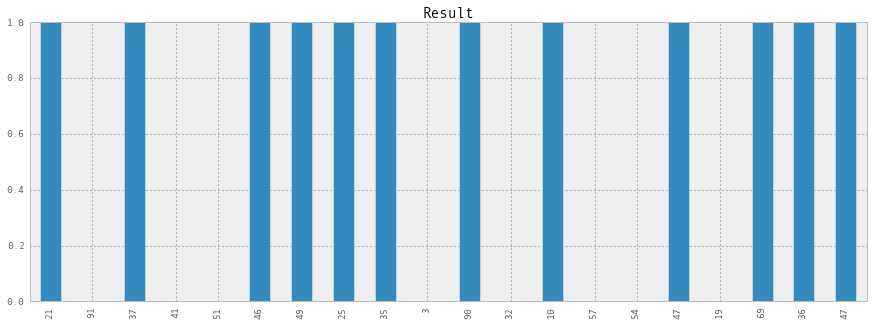

In [652]:
test_data['Result'][:20].plot(kind='bar', subplots=True, figsize=(15, 5))

To plot the predicted data we need to convert it into pandas data frame first.

In [653]:
predicted_result = pd.DataFrame(predicted_result, columns=['Predicted Result']);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c80051710>], dtype=object)

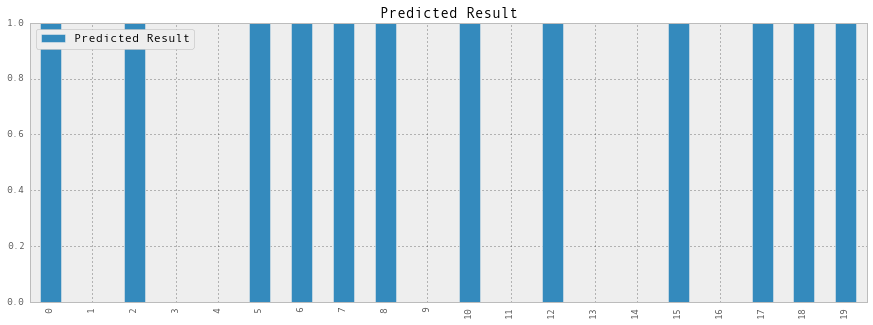

In [654]:
predicted_result[:20].plot(kind='bar', subplots=True, figsize=(15, 5))

We can see that both the graphs are exactly same.

# Now lets make another classifier which predicts how many Double Faults player one commits. 
The column which stores this data in input_data is 'DBF.1'. Since it is a continuous variable we will use linear 
regression this time. The target column will be 'DBF1' and rest of the columns will be input data for the classifier.

In [655]:
target_column = 'DBF.1';
input_data_columns = [];
for column in input_data.keys():
    if column != target_column:
        input_data_columns.append(column);

In [656]:
data_x = input_data[input_data_columns];
data_y = input_data[target_column];

In [657]:
linear_regr = linear_model.LinearRegression()

In [658]:
#Train the classifier
clf = linear_regr.fit(data_x, data_y);

In [659]:
#Test data input
test_data_x = test_data[input_data_columns];

predicted_result = clf.predict(test_data_x)

In [660]:
predicted_result

array([ 2.74779308,  1.67238117,  2.36776923,  7.8194301 ,  4.87519811,
        2.32006346,  1.01121204,  3.54523607,  1.51978448,  5.86539656,
        0.75116728,  5.46831964,  3.08376441,  3.90031732,  6.11200521,
        0.66831455,  4.33585159,  3.07630115,  4.60172398,  3.49252406,
        2.50659887,  3.66917416,  2.83684836,  5.06534419,  1.98625225,
        1.55160982,  1.25999678,  3.47297729,  2.37111206,  4.18058938,
        2.99519133,  5.88191592,  2.49548027,  4.93789543,  6.93233857,
        3.82858275,  3.03866949,  1.10498487,  1.78422775,  3.73881725,
        4.9016726 ,  3.12334665,  4.95562455,  0.74202127,  7.55011293,
        2.49019305,  5.7575831 ,  4.00299716,  4.69414731,  1.56067197,
        3.72760066,  3.90616084,  3.38656288,  2.36034862,  6.07611077,
        3.9210789 ,  5.27728726,  3.0603467 ,  2.29113721,  2.81313673,
       -0.2414988 ,  6.29687812,  5.72287654,  1.87690805,  2.50348527,
        1.18380709,  2.17546158,  3.34234649,  2.40321095,  2.43

In [661]:
test_data['Predicted_DBF.1'] = predicted_result

In [662]:
#Lets check the actual result versus predicted result
test_data[['DBF.1', 'Predicted_DBF.1']]

,DBF.1,Predicted_DBF.1
21,4,2.747793
91,3,1.672381
37,4,2.367769
41,5,7.819430
51,7,4.875198
46,1,2.320063
49,1,1.011212
25,3,3.545236
35,2,1.519784
3,8,5.865397


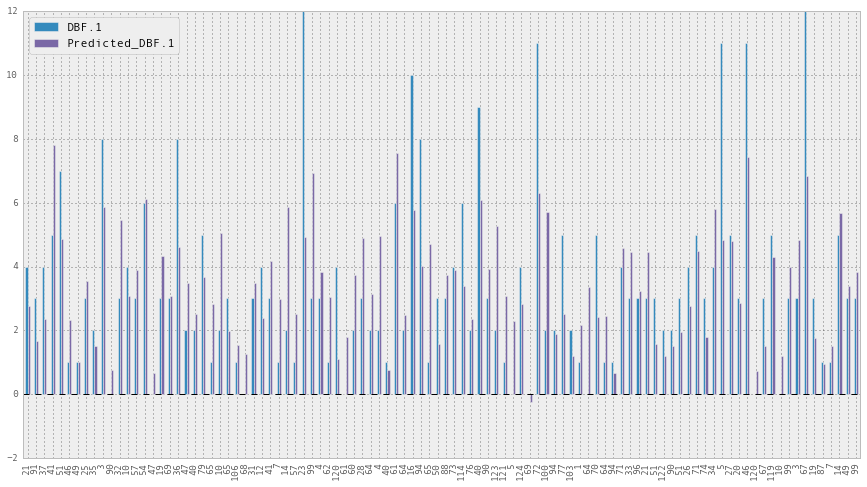

In [663]:
test_data[['DBF.1', 'Predicted_DBF.1']].plot(kind='bar', figsize=(15, 8))

In [664]:
test_data['Prediction_error'] = abs(test_data['DBF.1'] - test_data['Predicted_DBF.1'])*100/test_data['DBF.1']

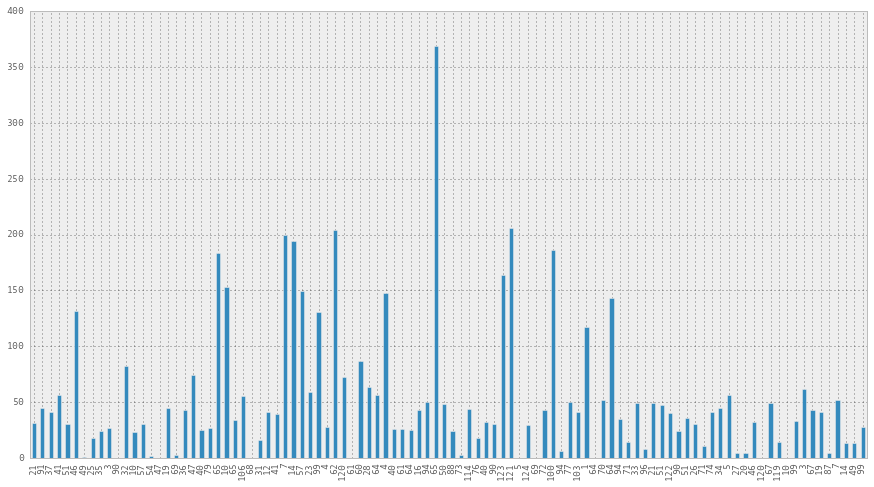

In [665]:
test_data['Prediction_error'].plot(kind='bar', figsize=(15, 8));

# Lets now predict the tournament name to which a game belongs to:

The data related to tournament name is in column 'Type'. We will use support vector machine algorithm to predict this data.

In [666]:
#Our target column is 'Type'
target_column = 'Type';
input_data_columns = [];
for column in input_data.keys():
    if column != target_column:
        input_data_columns.append(column);

Based on the target column, lets get data_x, and data_y to train the classifier

In [667]:
data_x = input_data[input_data_columns];
data_y = input_data[target_column];

In [668]:
from sklearn import svm
svm_clf = svm.SVC();
#Train the classifier now
svm_clf.fit(data_x, data_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [669]:
#Test data input
test_data_x = test_data[input_data_columns];
test_data_y = test_data[target_column];

predicted_result = svm_clf.predict(test_data_x)

In [670]:
predicted_result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [671]:
results = pd.DataFrame({'Actual_Type': tournament_fit.inverse_transform(test_data_y.values[:]),
                        'Predicted_Type': tournament_fit.inverse_transform(predicted_result[:])})

In [672]:
#Lets see the predicted result versus actual result
results[['Actual_Type', 'Predicted_Type']]

,Actual_Type,Predicted_Type
0,Wimbledon-women-2013,AusOpen-women-2013
1,FrenchOpen-women-2013,AusOpen-women-2013
2,AusOpen-women-2013,AusOpen-women-2013
3,Wimbledon-men-2013,AusOpen-women-2013
4,AusOpen-women-2013,AusOpen-women-2013
5,FrenchOpen-women-2013,AusOpen-women-2013
6,AusOpen-men-2013,AusOpen-women-2013
7,USOpen-women-2013,AusOpen-women-2013
8,Wimbledon-men-2013,AusOpen-women-2013
9,USOpen-men-2013,AusOpen-women-2013


Lets plot the two results

In [673]:
#Number of correct predictions
len(results[results['Actual_Type'] == results['Predicted_Type']])

10

In [674]:
#Number of incorrect predictions
len(results[results['Actual_Type'] != results['Predicted_Type']])

90

# Let us now make a classifier to predict "Which palyer is Player1 playing against in the match?" 

We will use Logistic regression first to predict the results. Then we will predict the results using SVM method, and will compare both the results. Lets start by gathering the training and test data.

In [675]:
#Our target column is 'Player2'
target_column = 'Player2';
input_data_columns = [];
for column in input_data.keys():
    if column != target_column:
        input_data_columns.append(column);

In [676]:
data_x = input_data[input_data_columns];
data_y = input_data[target_column];

test_data_x = test_data[input_data_columns];
test_data_y = test_data[target_column];

Lets verify the data by checking a few rows

In [677]:
data_x[:5]

,Player1,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,...,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,Type
48,519,1,0,1,3,57,52,43,25,29,...,8,21,28,122,6,6,6,6,0,0
54,364,1,1,3,1,46,38,54,29,8,...,12,12,25,110,3,6,3,4,0,4
9,317,1,1,3,0,67,56,33,21,22,...,0,23,15,0,6,4,2,0,0,6
1,188,6,0,0,2,44,12,56,7,1,...,8,30,20,0,6,6,0,0,0,5
107,615,3,0,2,3,63,99,37,52,15,...,13,52,80,213,5,6,6,7,8,2


In [678]:
data_y[:5]

48     299
54     104
9      482
1      621
107    297
Name: Player2, dtype: int64

In [679]:
test_data_x[:5]

,Player1,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,...,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,Type
21,115,1,1,2,0,54,23,46,19,1,...,0,10,7,0,3,4,0,0,0,7
91,127,2,0,0,2,70,29,30,10,1,...,7,2,5,72,7,6,0,0,0,3
37,666,1,1,2,0,74,33,26,6,1,...,6,0,0,58,2,4,0,0,0,1
41,257,1,0,2,3,58,63,42,20,19,...,7,47,31,0,6,6,3,4,6,6
51,604,1,0,0,2,68,43,32,14,3,...,12,0,0,93,7,6,0,0,0,1


In [680]:
test_data_y[:5]

21    549
91    102
37    330
41    144
51     65
Name: Player2, dtype: int64

In [681]:
#Lets train the logistic classifier
logistic_clf = logistic_regr.fit(data_x, data_y);

Lets predict the results for test_data now.

In [682]:
predicted_results = logistic_clf.predict(test_data_x);

Lets put actual and predicted results in a single data frame

In [683]:
results = pd.DataFrame({'Actual_Player2': names_fit.inverse_transform(test_data_y.values[:]), 'Logistic_Player2': names_fit.inverse_transform(predicted_results[:])})

lets checkout a few results

In [684]:
results

,Actual_Player2,Logistic_Player2
0,S.Murray,F.Pennetta
1,Bojana Jovanovski,Ana Ivanovic
2,Katerina Siniakova,Lara Arruabarrena
3,D.Kudla,G.Soeda
4,Anastasia Pavlyuchenkova,Yen-Hsun Lu
5,Donna Vekic,Svetlana Kuznetsova
6,Tim Smyczek,Ekaterina Makarova
7,S Lisicki,M.Keys
8,S.Bolelli,Ernests Gulbis
9,Dmitry Tursunov,Edouard Roger-Vasselin


Lets see the palyers for which it has predicted correctly

In [685]:
results[results['Actual_Player2'] == results['Logistic_Player2']]

,Actual_Player2,Logistic_Player2
16,F Pennetta,F Pennetta
59,Rafael Nadal,Rafael Nadal
79,C Suarez Navarro,C Suarez Navarro


In [686]:
#Number of correct results
len(results[results['Actual_Player2'] == results['Logistic_Player2']])

3

In [687]:
#Number of ivcorrect results
len(results[results['Actual_Player2'] != results['Logistic_Player2']])

97

# Now lets predict the palyer names using SVM algorithm on the same data.

In [688]:
from sklearn import svm
svm_clf = svm.LinearSVC();

In [689]:
#Lets train the classifier
svm_clf.fit(data_x, data_y);

In [690]:
#predict the result on test_data now
predicted_results = svm_clf.predict(test_data_x)

In [691]:
#Lets fit the predicted results in the results data frame
results['Svm_Player2'] = names_fit.inverse_transform(predicted_results[:])

In [692]:
results

,Actual_Player2,Logistic_Player2,Svm_Player2
0,S.Murray,F.Pennetta,M.Ebden
1,Bojana Jovanovski,Ana Ivanovic,Nikolay Davydenko
2,Katerina Siniakova,Lara Arruabarrena,Madison Keys
3,D.Kudla,G.Soeda,G.Soeda
4,Anastasia Pavlyuchenkova,Yen-Hsun Lu,Nikolay Davydenko
5,Donna Vekic,Svetlana Kuznetsova,Shuai Peng
6,Tim Smyczek,Ekaterina Makarova,Shuai Peng
7,S Lisicki,M.Keys,C Garcia
8,S.Bolelli,Ernests Gulbis,B.Knittel
9,Dmitry Tursunov,Edouard Roger-Vasselin,Edouard Roger-Vasselin


In [693]:
#number of correct predictions by svm
len(results[results['Actual_Player2'] == results['Svm_Player2']])

1

In [694]:
#The players for which it predicted correctly is
results[results['Actual_Player2'] == results['Svm_Player2']]

,Actual_Player2,Logistic_Player2,Svm_Player2
46,V Azarenka,E Svitolina,V Azarenka


Here we see that Logistic alogrithm predicted incorrectly for these players

In [695]:
#number of incorrect predictions by svm
len(results[results['Actual_Player2'] != results['Svm_Player2']])

99

# Lets try SVM with RBF kernel now

In [696]:
svm_clf = svm.SVC(kernel='rbf')

In [697]:
svm_clf.fit(data_x, data_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [698]:
#predict the result on test_data now
predicted_results = svm_clf.predict(test_data_x)

In [699]:
#Lets fit the predicted results in the results data frame
results['Svm_Player2'] = names_fit.inverse_transform(predicted_results[:])

In [700]:
#The players for which it predicted correctly is
results[results['Actual_Player2'] == results['Svm_Player2']]

,Actual_Player2,Logistic_Player2,Svm_Player2
34,David Ferrer,Mikhail Youzhny,David Ferrer
80,David Ferrer,Rafael Nadal,David Ferrer


In [701]:
#Number of correct predictions
len(results[results['Actual_Player2'] == results['Svm_Player2']])

2

In [702]:
#Number of incorrect predictions
len(results[results['Actual_Player2'] != results['Svm_Player2']])

98

In [703]:
from sklearn.ensemble import RandomForestClassifier

In [704]:
forest_clf = RandomForestClassifier(n_estimators=200)

In [705]:
forest_clf.fit(data_x, data_y)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

In [706]:
predicted_results = forest_clf.predict(test_data_x)

In [707]:
#Lets fit the predicted results in the results data frame
results['Forest_Player2'] = names_fit.inverse_transform(predicted_results[:])

In [708]:
#Number of correct predictions
len(results[results['Actual_Player2'] == results['Forest_Player2']])

3

In [709]:
#Number of incorrect predictions
len(results[results['Actual_Player2'] != results['Forest_Player2']])

97